

The available information includes:

- First column describes the number of data information/rows there are starting from 0 count starting after the heading row
- Second column describes the umemployment percentage which is a number out of a hundred and can be a decimal (float)
- Third column describes the GDP per capita which is in dollars rounded to whole dollars
- Fourth column is the government type (which is one of 5 possibilities which are republic, constitutional monarchy, communist state, n/a, or absolute monarchy)
- Fifth column is the population of the country in number of people



how the gdp per capita connects with each country
1. Compare the real gdp (population * gdp per capita) for each country in a bar graph with each country being a bar which finds the country with the highest real gdp. country on x axis and dollars on y axis.
2. Given the type of government show the real gdp at the highest population. A bar graph with population on the x axis and gdp on the y axis.
3. Have country on the x axis and dollars on the y axis and make 2 bar graphs comparing the real gdp (population * gdp per capita) and the potential gdp (real gdp/ unemployment rate) per country. <-- choice





We would like to find the country with the smallest difference between potential gdp and real gdp.
The graph should have 2 bars per country one for potential gdp and one for real gdp. with dollars on the y axis and country on the x. It can produce the country with the smallest difference between potential and real gdp if needed.



'''python


main('country_per_cap_gdp_unemployment_gov_type_pop .csv')


'''

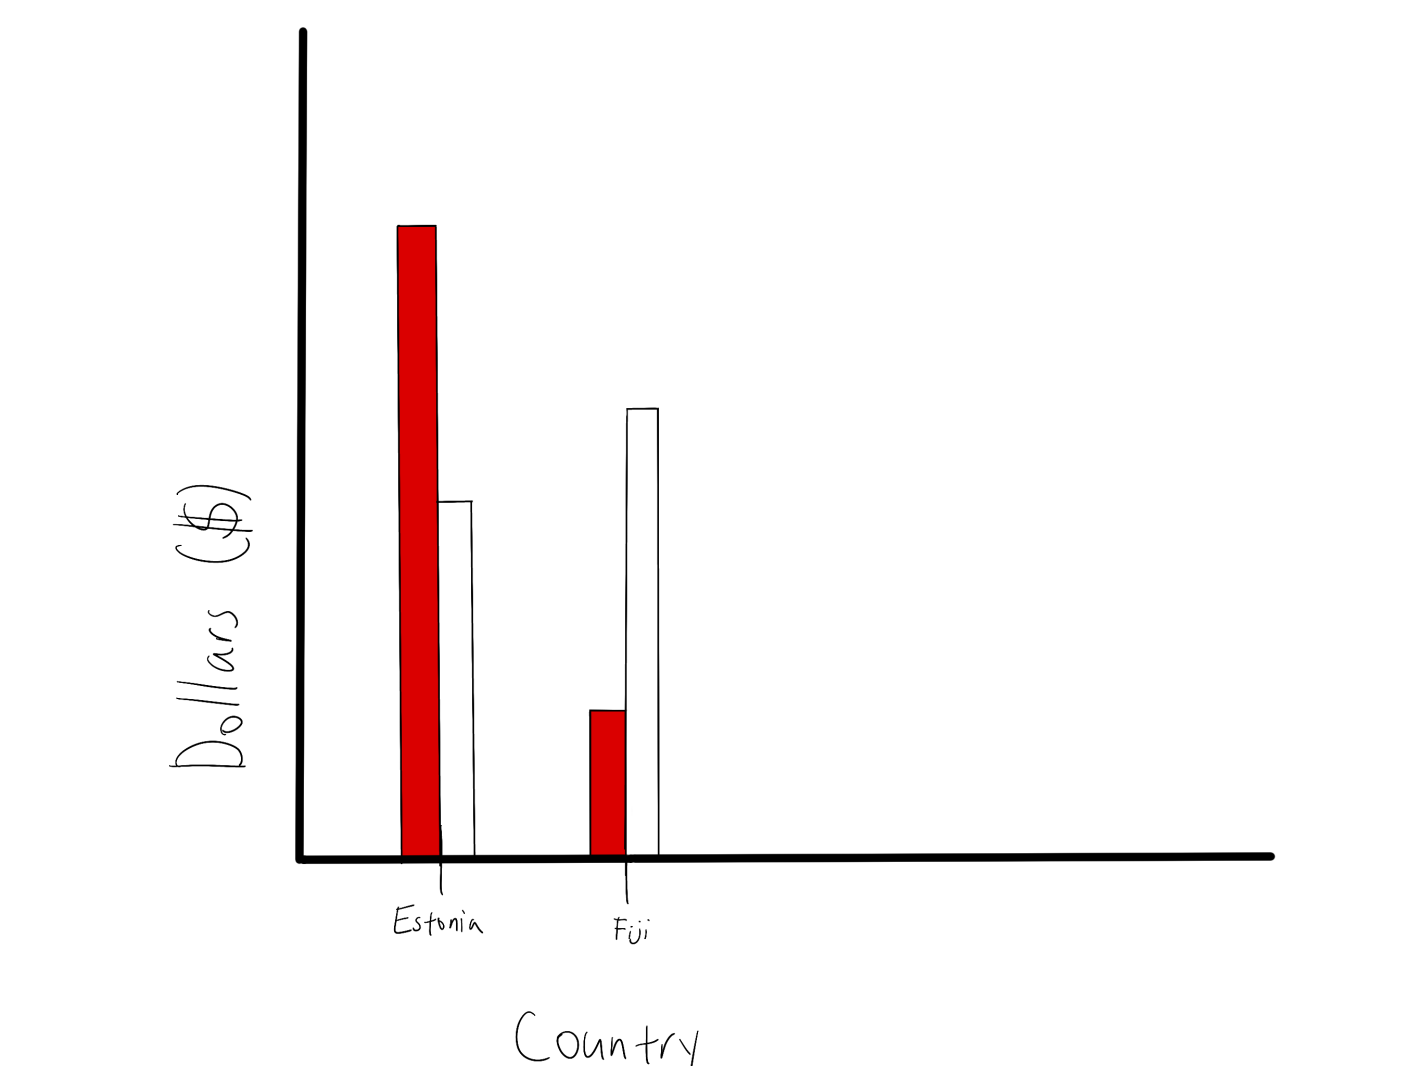

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv
from matplotlib import pyplot
#we are looking for the country with the smallest gap between real gdp and potential gdp so the
#values needed are the country name, the unemployment rate, the gdp per capita, and the population which are used
#for calculating real and potential gdp


CountryGDP = NamedTuple('CountryGDP', [('country', str),
                                       ('unemployment', float), # in range [0, ...)
                                       ('gdp', int), # in range [0, ...)
                                       ('population', int)]) # in range [0, ...)

#interp. data about a country with the country name, its unemployment rate (a percentage with decimals) in range
#from [0, ...), its gdp per capita rounded to the nearest dollar in range from [0, ...), and the population
#which is also in range from [0, ...).

CGDP0 = CountryGDP('Albania', 19.3, 11305, 2886026)
CGDP1 = CountryGDP('Algeria', 11.2, 14687, 40400000)
CGDP2 = CountryGDP('Canada', 0, 0.0, 0)

#template based on compound (4 fields)
@typecheck
def fn_for_country_gdp(cgdp: CountryGDP) -> ...:
    return ...(cgdp.country,
               cgdp.unemployment,
               cgdp.gdp,
               cgdp.population)


# List[CountryGDP]
# interp. a list of CountryGDP

LOCGDP0 = []
LOCGDP1 = [CGDP0, CGDP1]

#template based on arbitrary-sized data
@typecheck
def fn_for_locgdp(locgdp: List[CountryGDP]) -> ...:
    #description of accumlator
    acc = ... #type: ...
    
    for cgdp in locgdp:
        acc = ...(cgdp, acc)
        
    return ...(acc)


# List[str]
# interp. a list of strings
LOS0 = []
LOS1 = ['hello', 'world']

# template based on arbitrary-sized data
@typecheck
def fn_for_los(los: List[str]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for s in los:
        acc = ...(s, acc)
        
    return ...(acc)


# List[int]
# interp. a list of integers
LOI0 = []
LOI1 = [1, -12]

# template based on arbitrary-sized data
@typecheck
def fn_for_loi(loi: List[int]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for i in loi:
        acc = ...(i, acc)
        
    return ...(acc)

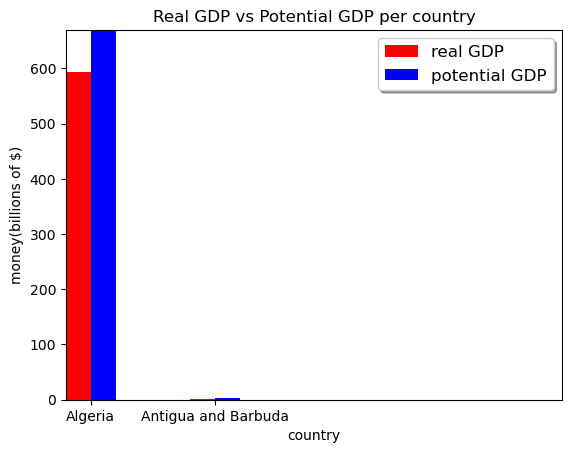

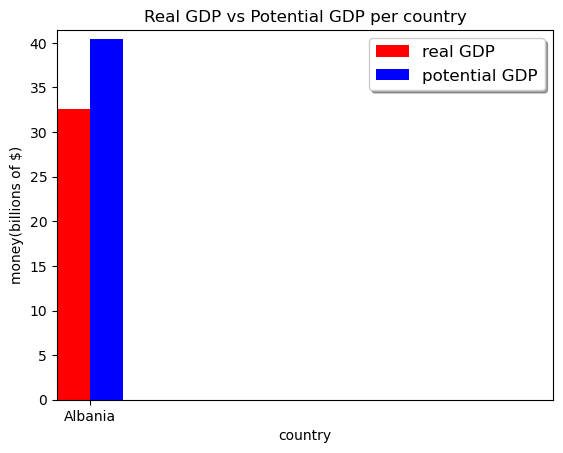

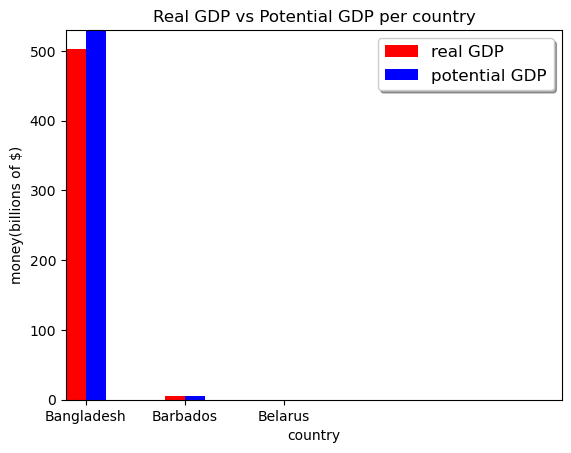

3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed
3 of 3 tests passed


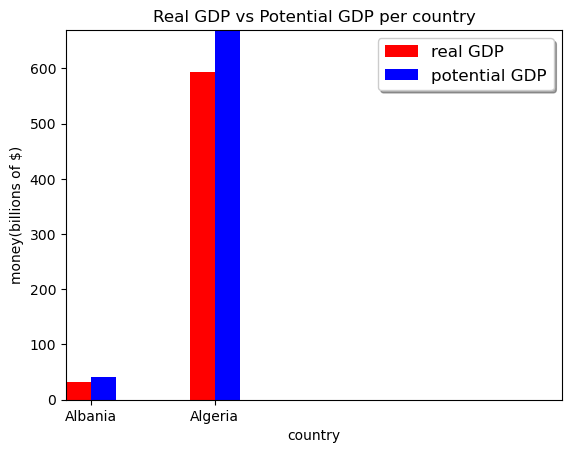

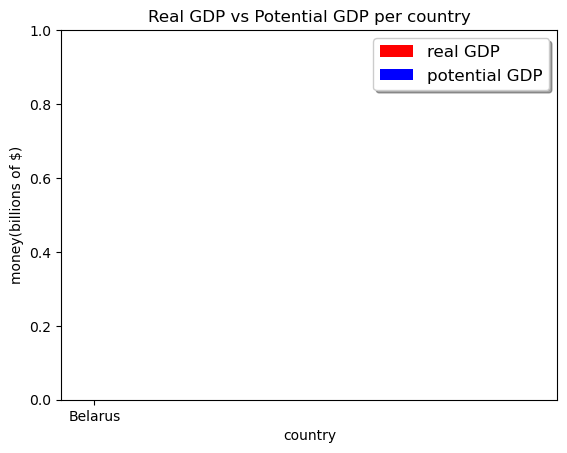

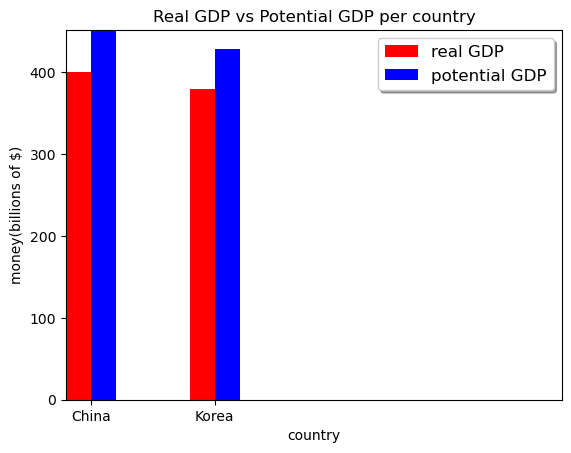

3 of 3 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed
2 of 2 tests passed


In [2]:
###########
# Functions

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, and draws a bar graph with countries on the x axis and each country having
    2 bars, one for real gdp (population * gdp per capita) and 
    1 for the potential gdp (real gdp/ unemployment rate) with dollars in billions on the y axis
    """
    #return None #stub
    #Template from HtDAP, based on function composition 
    return real_gdp_vs_pot_gdp(read(filename))
    
    

###########
# Functions

@typecheck
def read(filename: str) -> List[CountryGDP]:
    """    
    reads information from the specified file and returns a list of CountryGDP 
    """
    #return []  #stub
    # Template from HtDAP
    # locgdp contains the result so far
    locgdp = [] # type: List[CountryGDP]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            cgdp = CountryGDP(row[1], parse_float(row[2]), parse_int(row[3]), parse_str_to_int(row[5]))
            locgdp.append(cgdp)
    
    return locgdp


@typecheck
def parse_str_to_int(s: str) -> int:
    """
    converts the string into an integer
    """
    #return 0 #stub
    #template based on atomic non-distinct
    
    no_comma = s.replace(',', '')
    return int(no_comma)


@typecheck
def real_gdp_vs_pot_gdp(locgdp: List[CountryGDP]) -> None:
    """
    draws a bar graph with countries on the x axis and each country having
    2 bars, one for real gdp (population * gdp per capita) and 
    1 for the potential gdp (real gdp/ unemployment rate) with dollars in billions on the y axis
    """
    #return None #stub
    #template based on visualization
    
    y_vals1 = real_gdp(locgdp)
    y_vals2 = pot_gdp(locgdp)
    x_vals1 = sequence_of_numbers(y_vals1, 0, 1)
    x_vals2 = sequence_of_numbers(y_vals2, 0.2, 1)
    
    
    pyplot.xlabel('country')
    pyplot.ylabel('money(billions of $)')
    pyplot.title('Real GDP vs Potential GDP per country')

    pyplot.bar(x_vals1, y_vals1, 0.2, align = 'edge', label = 'real GDP', color = 'r')
    pyplot.bar(x_vals2, y_vals2, 0.2, align = 'edge', label = 'potential GDP', color = 'b')
    legend = pyplot.legend(shadow = True, fontsize = 'large', loc = 'upper right')
    pyplot.xticks(x_vals2, country(locgdp))
    pyplot.axis([0, (len(country(locgdp))+2), 0, maximum(pot_gdp(locgdp))])

    pyplot.show()
    
    return None

@typecheck
def maximum(lof: List[float]) -> float:
    """
    returns the biggest number in the list of floats
    """
    #return 0.0 #stub
    #template based on List[float]
    max_so_far = lof[0] #type: float
    for f in lof:
        if (max_so_far <= f) == True:
            max_so_far = f
            
    return max_so_far + 1

@typecheck
def sequence_of_numbers(lof: List[float], initial: float, gap: float) -> List[float]:
    """
    takes in a list of floats and matches the number of items on the list to the number of items in
    the list produced and produces a list of numbers that are in sequence that start with the initial
    value given and increase or decrease by the gap number given up to the amount of the given list
    """
    #return [] #stub
    #template based on List[float] and 2 additional parameters
    #sequence produces has amount of numbers equal to the amount of items in the list seen so far
    sequence = [] #type: List[float]
    #number is the number produced after adding gap
    number = initial
    for f in lof:
        sequence.append(number)
        number = number + gap
    return sequence

@typecheck
def country(locgdp: List[CountryGDP]) -> List[str]:
    """
    returns the country that is in each CountryGDP in the List[CountryGDP]
    """
    #return [] #stub
    #template based on List[CountryGDP]
    #all_countries has the countries seen so far
    all_countries = [] #type: List[str]
    for cgdp in locgdp:
        all_countries.append(get_country(cgdp))
    return all_countries
    

def get_country(cgdp: CountryGDP) -> str:
    """
    returns the country that is in CountryGDP
    """
    #return "" #stub
    #template based on CountryGDP
     
    return cgdp.country

def real_gdp(locgdp: List[CountryGDP]) -> List[int]:
    """
    returns a list of real gdps which is just a list of numbers
    """
    #return [] #stub
    #template based on List[CountryGDP]
    #real_gdp_list has all the real GDPs seen so far
    real_gdp_list = [] #type: List[int]
    for cgdp in locgdp:
        real_gdp_list.append(get_rgdp(cgdp))
        
    return real_gdp_list
    
def get_rgdp(cgdp: CountryGDP) -> int:
    """
    returns the real gdp for each CountryGDP in the list by multiplying the population by the 
    GDP per capita
    """
    #return 0 #stub
    #template based on CountryGDP
    
    return (cgdp.population * cgdp.gdp) / 1000000000

def pot_gdp(locgdp: List[CountryGDP]) -> List[float]:
    """
    returns the potential gdp for each CountryGDP in the list by dividing the real gdp by the unemployment
    rate
    """
    #return [] #stub
    #template based on List[CountryGDP]
    #pot_gdp_list has all the potential GDPS seen so far
    pot_gdp_list = [] #type: List[float]
    
    for cgdp in locgdp:
        pot_gdp_list.append(get_pgdp(cgdp))
        
    return pot_gdp_list
    
def get_pgdp(cgdp: CountryGDP) -> float:
    """
    returns the potential gdp by dividing the country's real gdp by the unemployment rate
    """
    #return 0.0 #stub
    #template based on CountryGDP
    if percentage_to_decimal(cgdp.unemployment) == 0:
        return 0
    else:
        return (((get_rgdp(cgdp) * 1000000000)) / (percentage_to_decimal(cgdp.unemployment))/1000000000)

def percentage_to_decimal(decimal: float) -> float:
    """
    converts a percentage to a number over 100 then 1- the number
    """
    #return 0.0 #stub
    #template based on atomic non-distinct
    if decimal != 0:
        return 1 - (decimal/100)
    else:
        return 0



start_testing()

# Examples and tests for main
expect(main('gdp_test1.csv'), None)

#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#    |                   |legend|
#    |                   |      |
#    |     X             +------
#  6 |   # X
#    |   # X
#    |   # X
#    |   # X               # X
#    +-----------------------------
#      Algeria      Antigua and Barbua
#                country
expect(main('gdp_test2.csv'), None)

#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#    |                   |legend|
#    |                   |      |
#    |     X             +------
#  3 |   # X
#    |   # X
#    |   # X
#    |   # X               
#    +-----------------------------
#      Albania      
#            country
expect(main('gdp_test4.csv'), None)
#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#    |     X                       |legend|
#  5 |   # X                       |      |
#    |   # X                       +------
#    |   # X
#    |   # X
#  1 |   # X
#    |   # X              # X
#    +-----------------------------------------
#      Bangladesh      Barbados       Belarus
#                country


summary()

start_testing()

# Examples and tests for read
expect(read("gdp_test1.csv"), [CountryGDP('Algeria', 11.2, 14687, 40400000),
                               CountryGDP('Antigua and Barbuda', 11.0, 22968, 86295)])
expect(read("gdp_test2.csv"), [CountryGDP('Albania', 19.3, 11305, 2886026)])
expect(read("gdp_test4.csv"), [CountryGDP('Bangladesh', 4.9, 3123, 161058000), CountryGDP('Barbados', 11.9, 16391, 285000)
                               , CountryGDP('Belarus', 0.0, 0, 0) ])

# show testing summary
summary()

#Examples and tests for parse_str_to_int
start_testing()
expect(parse_str_to_int("0"), 0)
expect(parse_str_to_int("200"), 200)
expect(parse_str_to_int("200,000"), 200000)
summary()

#Examples and tests for maximum
start_testing()
expect(maximum([0.0, 0.9, 2.3]), 3.3)
expect(maximum([0.1, 1.2, 5.3]), 6.3)
expect(maximum([1.3, 5.3, 10.5, 33.3]), 34.3)
summary()


#Examples and tests for sequence_of_numbers
start_testing()
expect(sequence_of_numbers([0.0, 1.0, 2.0], 0, 1), [0.0, 1.0, 2.0])
expect(sequence_of_numbers([0.1, 1.1, 1.2], 0, 1), [0.0, 1.0, 2.0])
expect(sequence_of_numbers([2.3, 8.3, 10.3, 20.3], 1, 3), [1, 4, 7, 10])
summary()

start_testing()

# Examples and tests for analyze 
expect(real_gdp_vs_pot_gdp(LOCGDP1), None)

#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#   6|                 X           |legend|
#    |               # X           |      |
#    |               # X           +------
#    |               # X
#    |               # X
#   1|     X         # X
#    |   # X         # X
#    +-----------------------------------------
#      Albania     Algeria
#                country

expect(real_gdp_vs_pot_gdp([CountryGDP('Belarus', 0.0, 0, 0)]), None)

#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#   1|                             |legend|
#    |                             |      |
#    |                             +------
#    |                
#    |               
#    |               
#    |               
#    +-----------------------------------------
#      Belarus    
#                country

expect(real_gdp_vs_pot_gdp([CountryGDP('China', 11.2, 10000, 40000000), CountryGDP('Korea', 11.2, 10000, 38000000)]), None)

#the graph should look like this: with country on the x axis and $ in billions in the y axis
#and legend in the top right with potential gdp and real gdp in it being blue and red in that order respectively
#  4 |     X                        |legend|
#    |   # X          X             |      |
#    |   # X        # X             +------
#    |   # X        # X   
#    |   # X        # X  
#    |   # X        # X  
#    |   # X        # X  
#    +-----------------------------------------
#      China      Korea   
#                country

summary()

#Examples and tests for country
start_testing()
expect(country(LOCGDP0), [])
expect(country(LOCGDP1), ['Albania', 'Algeria'])
summary()

#Examples and tests for get_country
start_testing()
expect(get_country(CGDP0), 'Albania')
expect(get_country(CGDP1), 'Algeria')
summary()


#Examples for real_gdp
start_testing()
expect(real_gdp(LOCGDP0), [])
expect(real_gdp(LOCGDP1), [(32626523930/1000000000), (593354800000/1000000000)])
summary()

#Examples and tests for get_rgdp
start_testing()
expect(get_rgdp(CGDP2), 0)
expect(get_rgdp(CGDP1), ((40400000*14687)/1000000000))
summary()

#Examples for pot_gdp
start_testing()
expect(pot_gdp(LOCGDP0), [])
expect(pot_gdp(LOCGDP1), [(40.42939768277571), (668.1923423423423)])
summary()

#Examples and tests for get_pgdp
start_testing()
expect(get_pgdp(CGDP1), (((40400000*14687)/(1-0.112)/1000000000)))
expect(get_pgdp(CGDP2), 0)
summary()

#Examples and tests for percentage_to_decimal
start_testing()
expect(percentage_to_decimal(20.0), (1-0.20))
expect(percentage_to_decimal(0), (0))
summary()


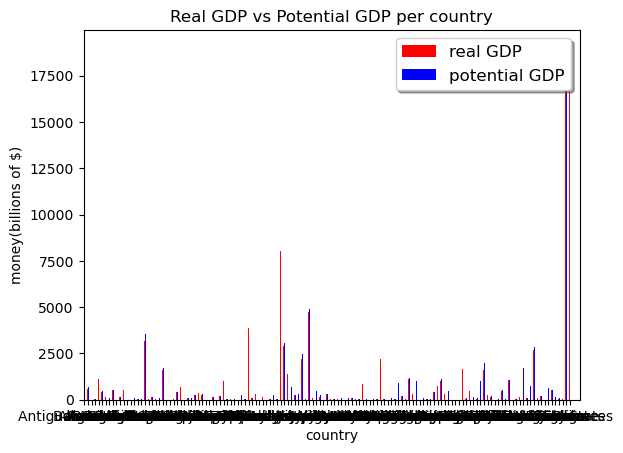

In [3]:
main('country_per_cap_gdp_unemployment_gov_type_pop.csv')